### Advance visualization

In [3]:
import pandas as pd
import os

In [4]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [71]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [72]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [73]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [74]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [75]:
## Year should be categoric not int64
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [77]:
movies.Genre.cat.categories ### the values of the categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") ## adding styles


In [79]:
#Joinplots

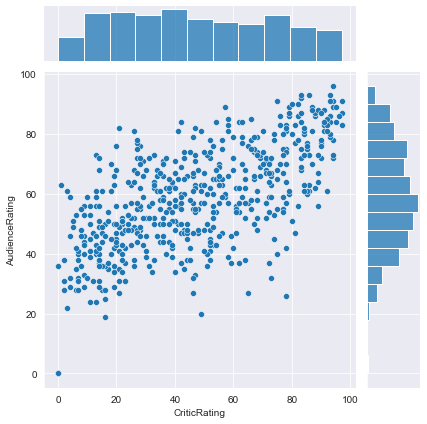

In [80]:
## see the distribution between two columns
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

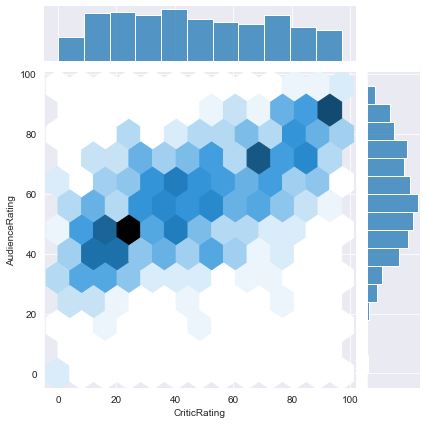

In [81]:
## Good for seeing the disribution in the form of clusters
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

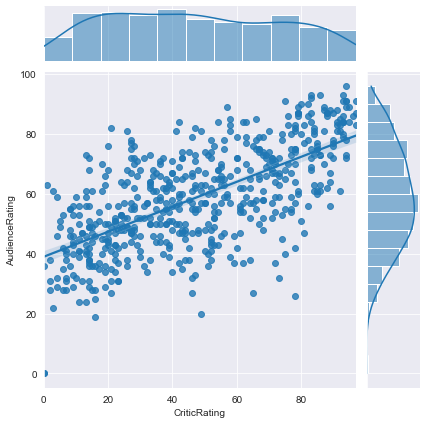

In [82]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='reg')

#### Historgrams

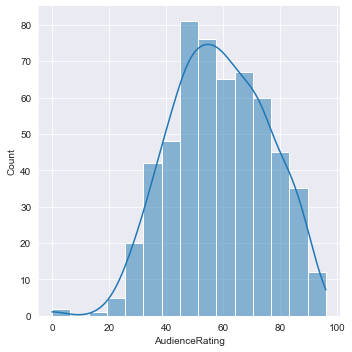

In [83]:
## looks a bit like normal distribution
m1 = sns.displot(movies.AudienceRating, bins = 15, kde=True)

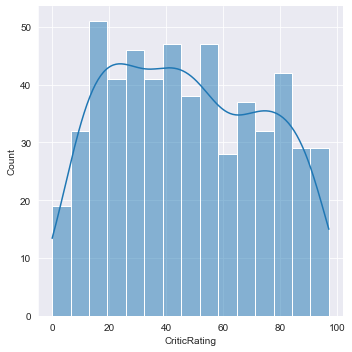

In [84]:
## looks like a uniform distribution
m2 = sns.displot(movies.CriticRating, bins = 15, kde=True)

---

#### Stacked Histograms

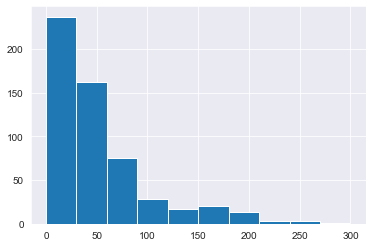

In [96]:
plt.hist(movies.BudgetMillions)
plt.show()

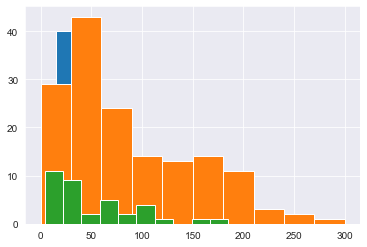

In [100]:
## showing the columns and hiding whats behind
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show()

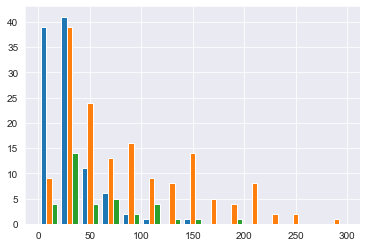

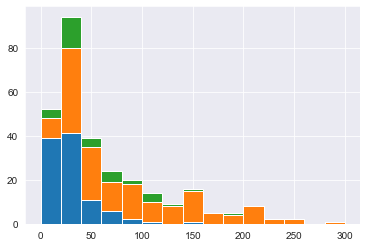

In [103]:
## showing the columns in a stacked way
series = [movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions]

plt.hist(series, bins=15)
plt.show()

plt.hist(series, bins=15, stacked=True)
plt.show()

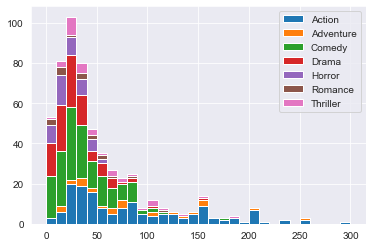

In [113]:
### Ploting all Genre using for-loop
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
plt.hist(list1, bins=30, stacked=True, rwidth=1, label=movies.Genre.cat.categories.to_list())
plt.legend()

#### KDE Plot

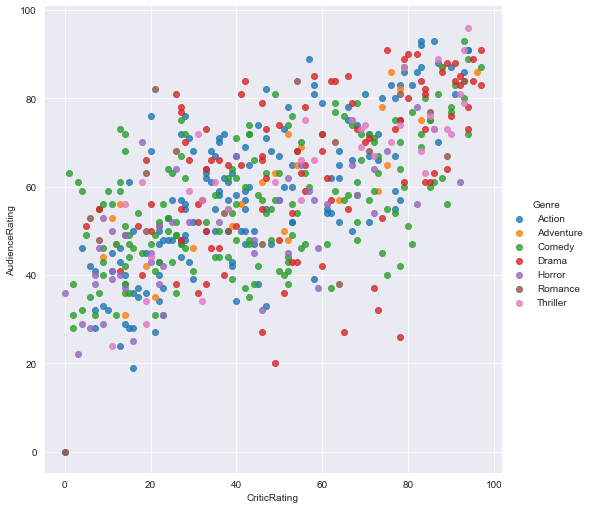

In [117]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre',height=7, aspect=1)

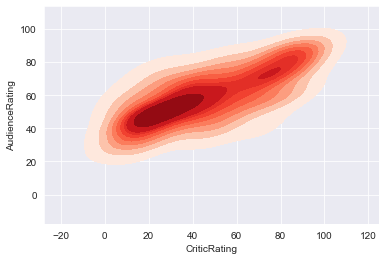

In [128]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')

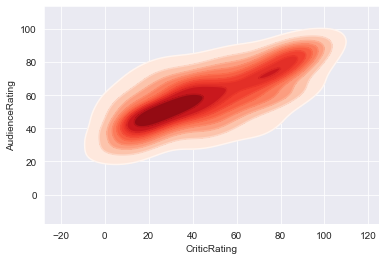

In [131]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')
## Tip adds borders
k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

#### Subplots

In [136]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") ## adding styles

We can see connection between the two columns regading their distribution


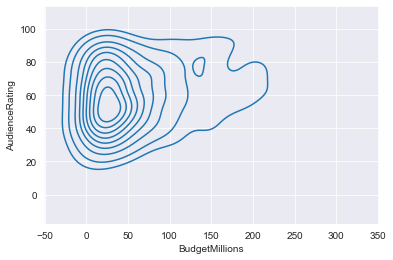

In [134]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating) 

The below looks like a uniform distribution while the above look more like normal distribution

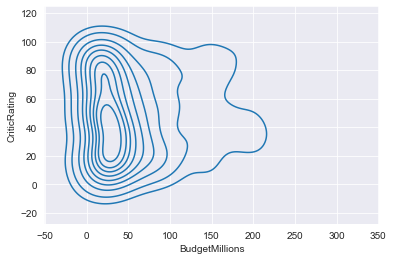

In [137]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

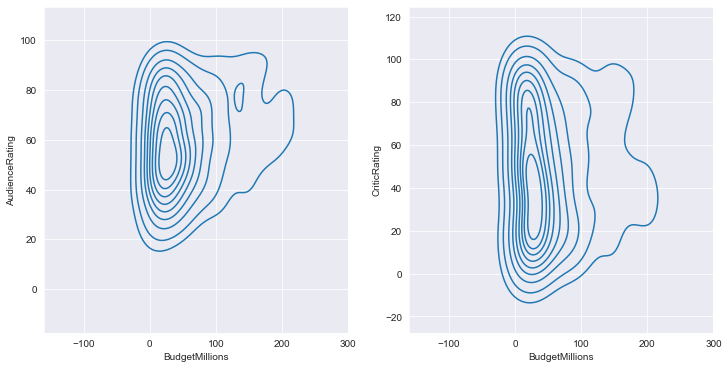

In [150]:
## if axes is 2-D then we need to acces the axes as a matrix [i,j]
figure, axes = plt.subplots(1,2, figsize=(12,6), sharex=True) 
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k1.set(xlim=(-160, 300)) ## sets the limit of x axis
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])


#### ViolinPlots

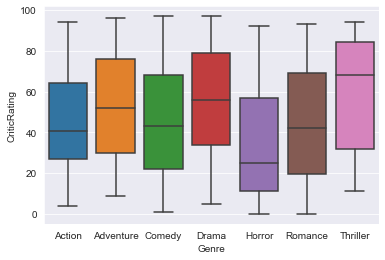

In [153]:
z = sns.boxplot(data=movies, x='Genre', y='CriticRating')

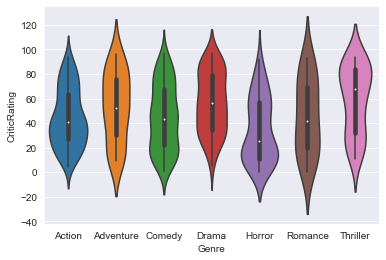

In [156]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

Sometimes in violinplot we can see consintration better then boxplots. <br>
For example, we can see in the Comedy violin plot there are 3 diffrent consintrations.

---

#### Facet Grids

Splitting visualizations based on some rules, unlike subplots where we populate the the figure with what ever plot we want

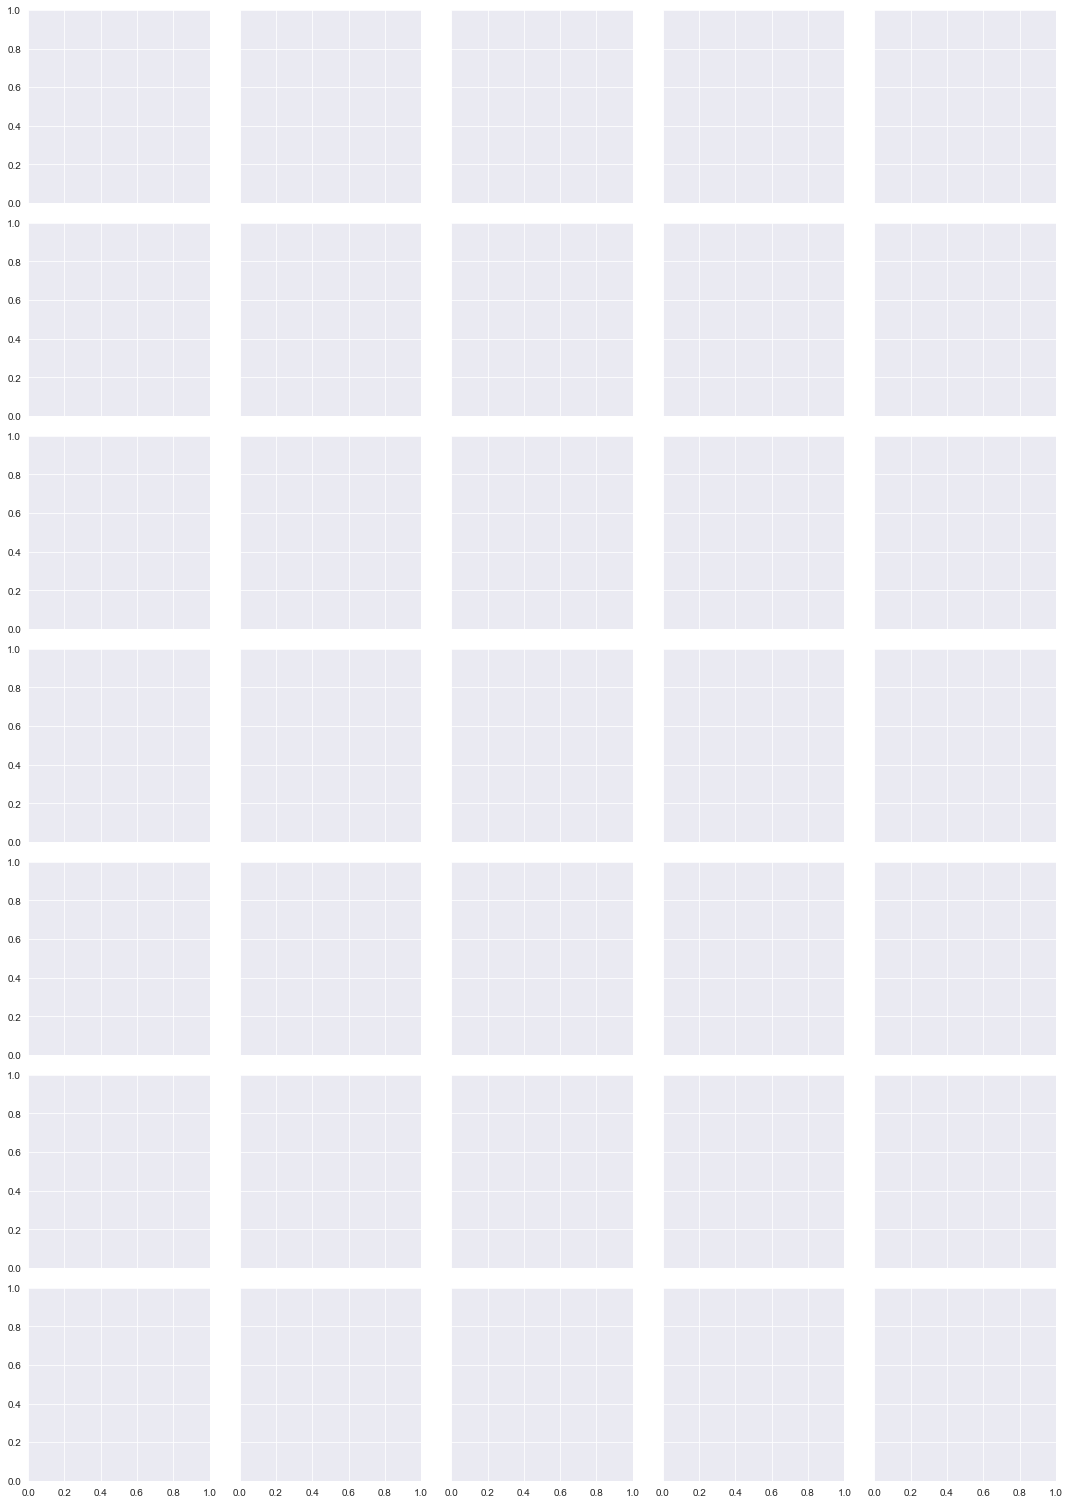

In [158]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

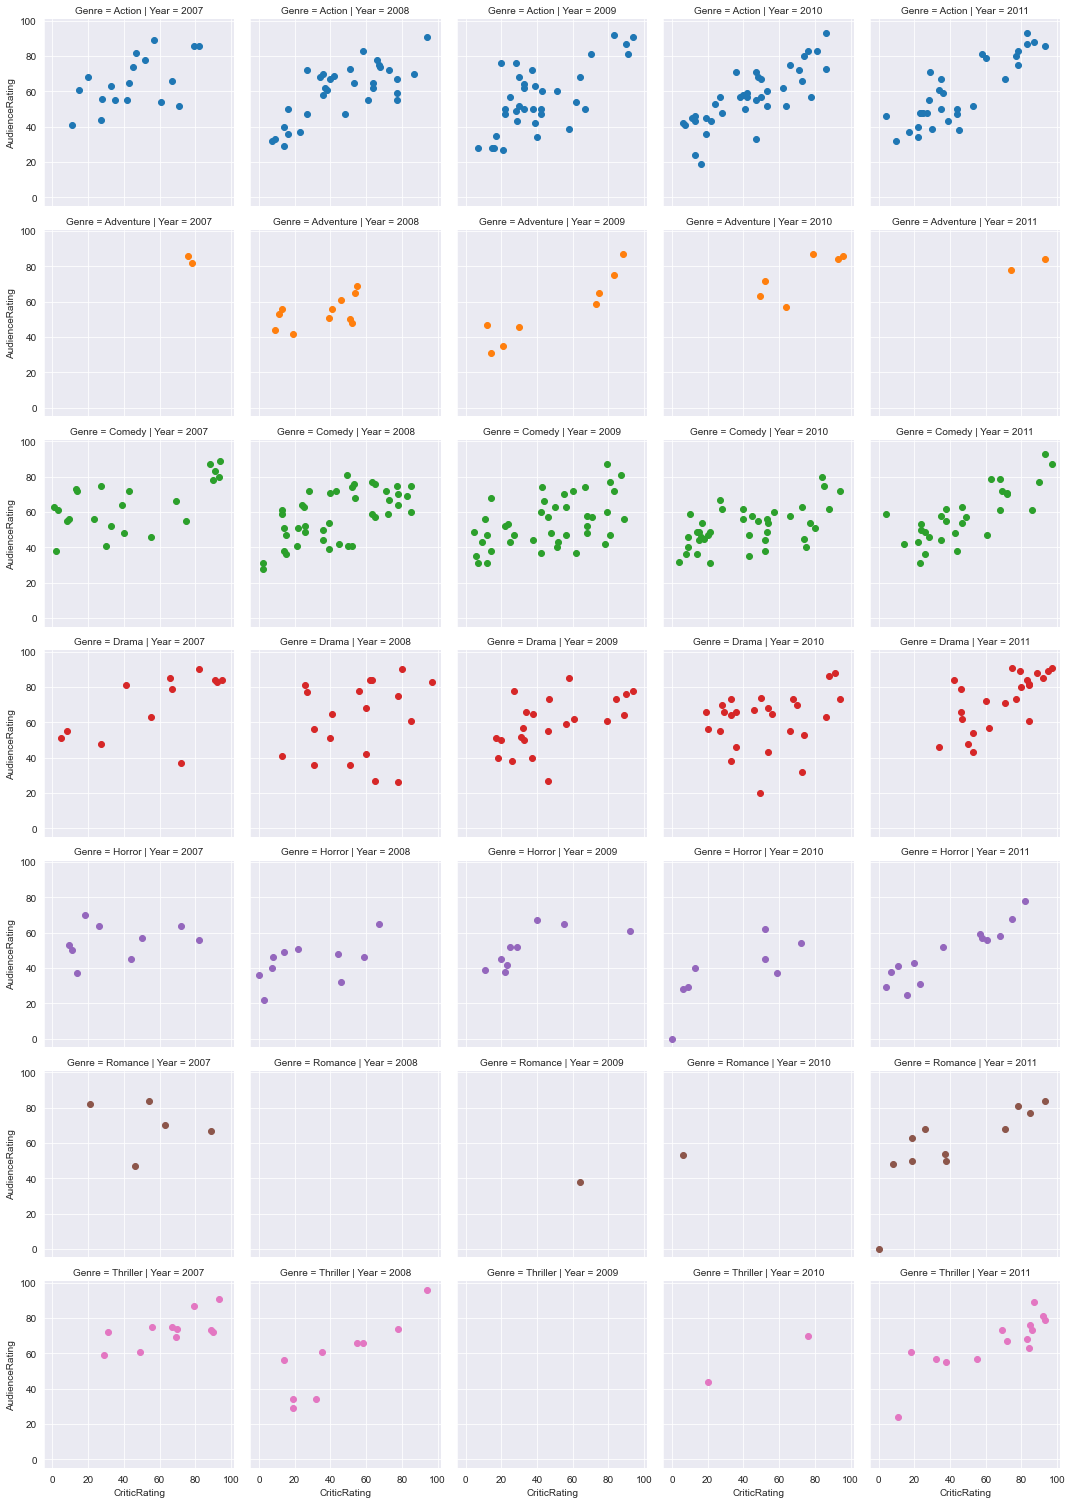

In [160]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

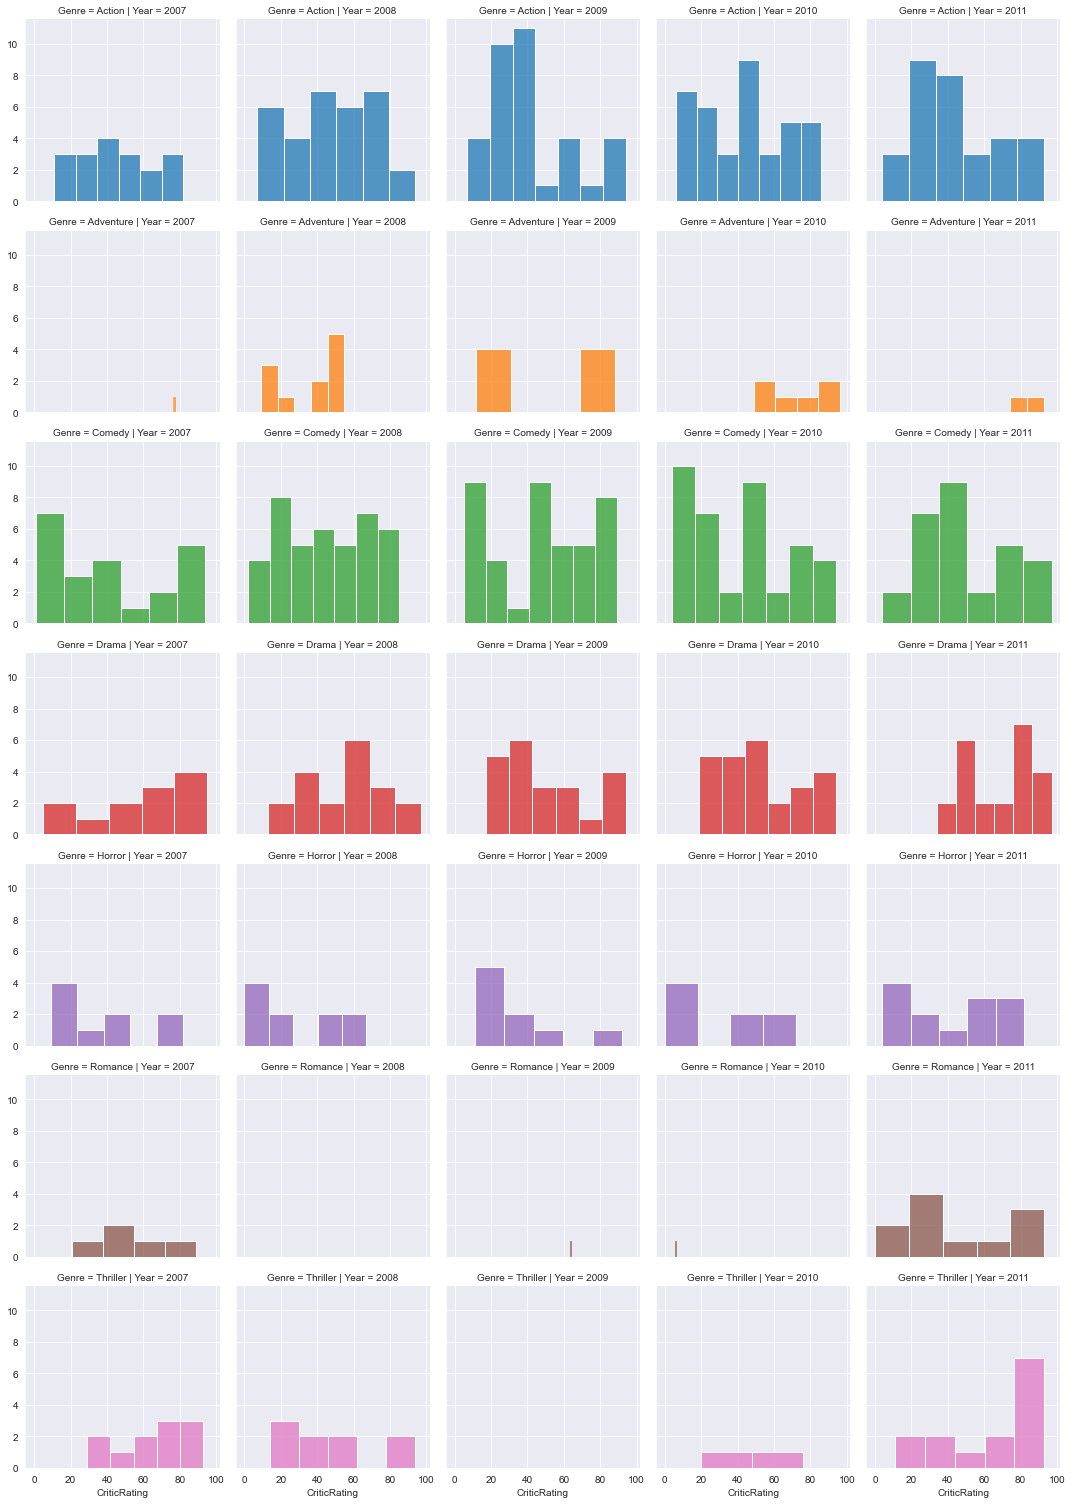

In [162]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(sns.histplot, 'CriticRating')

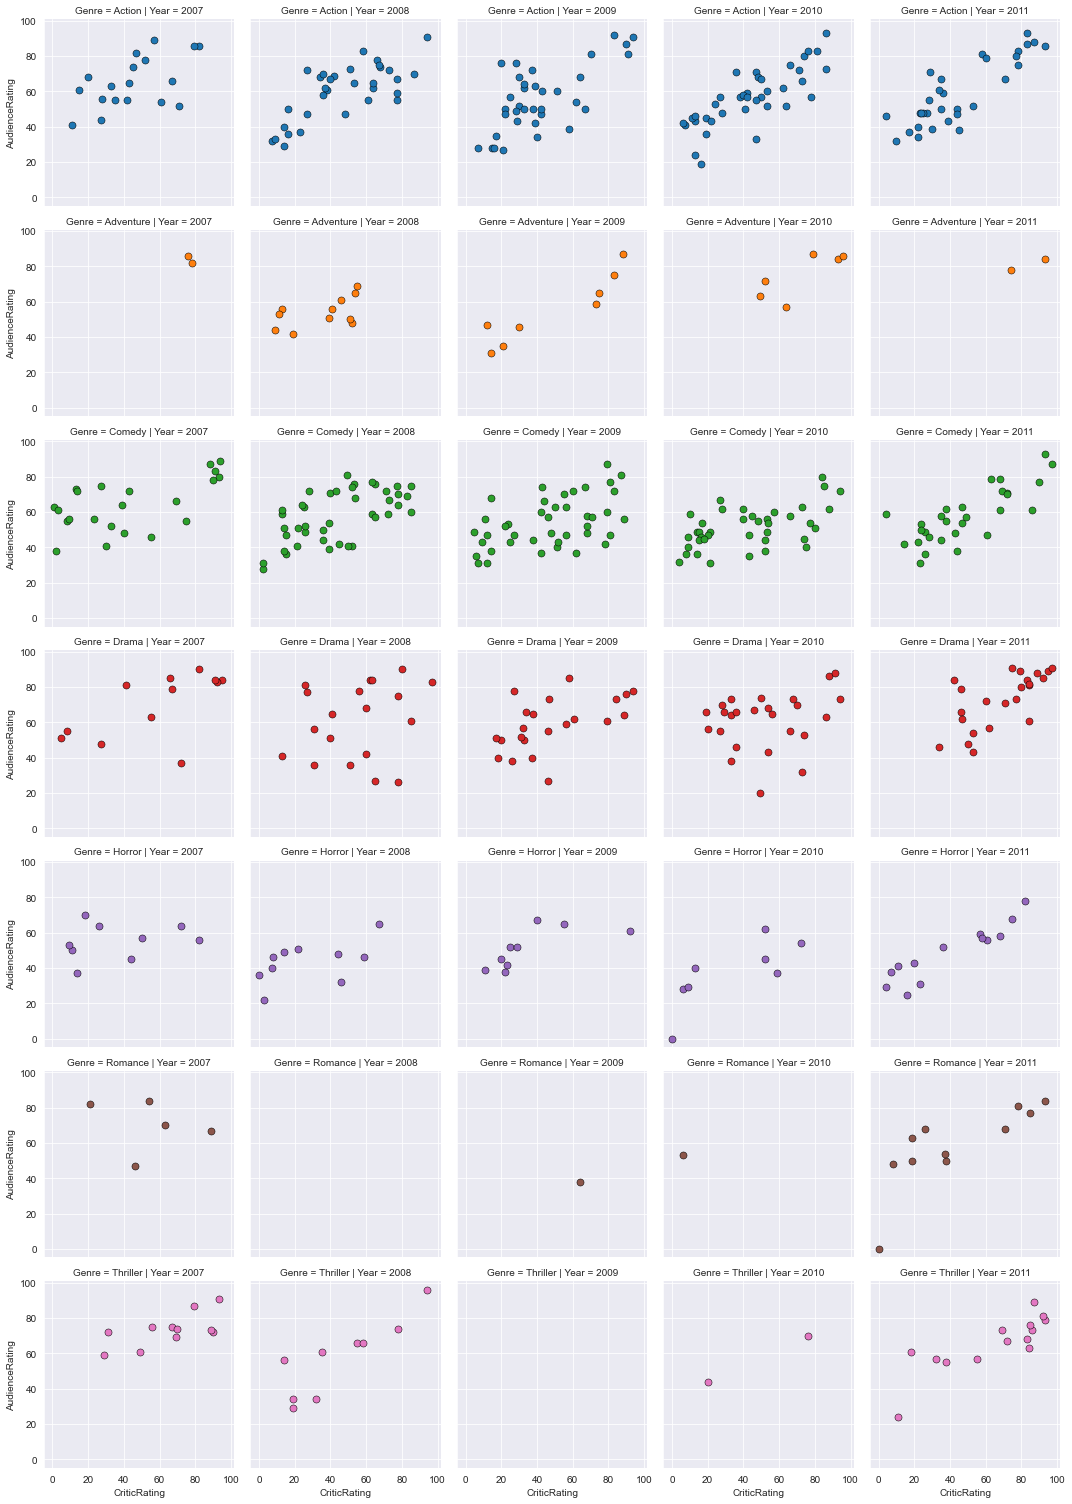

In [169]:
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

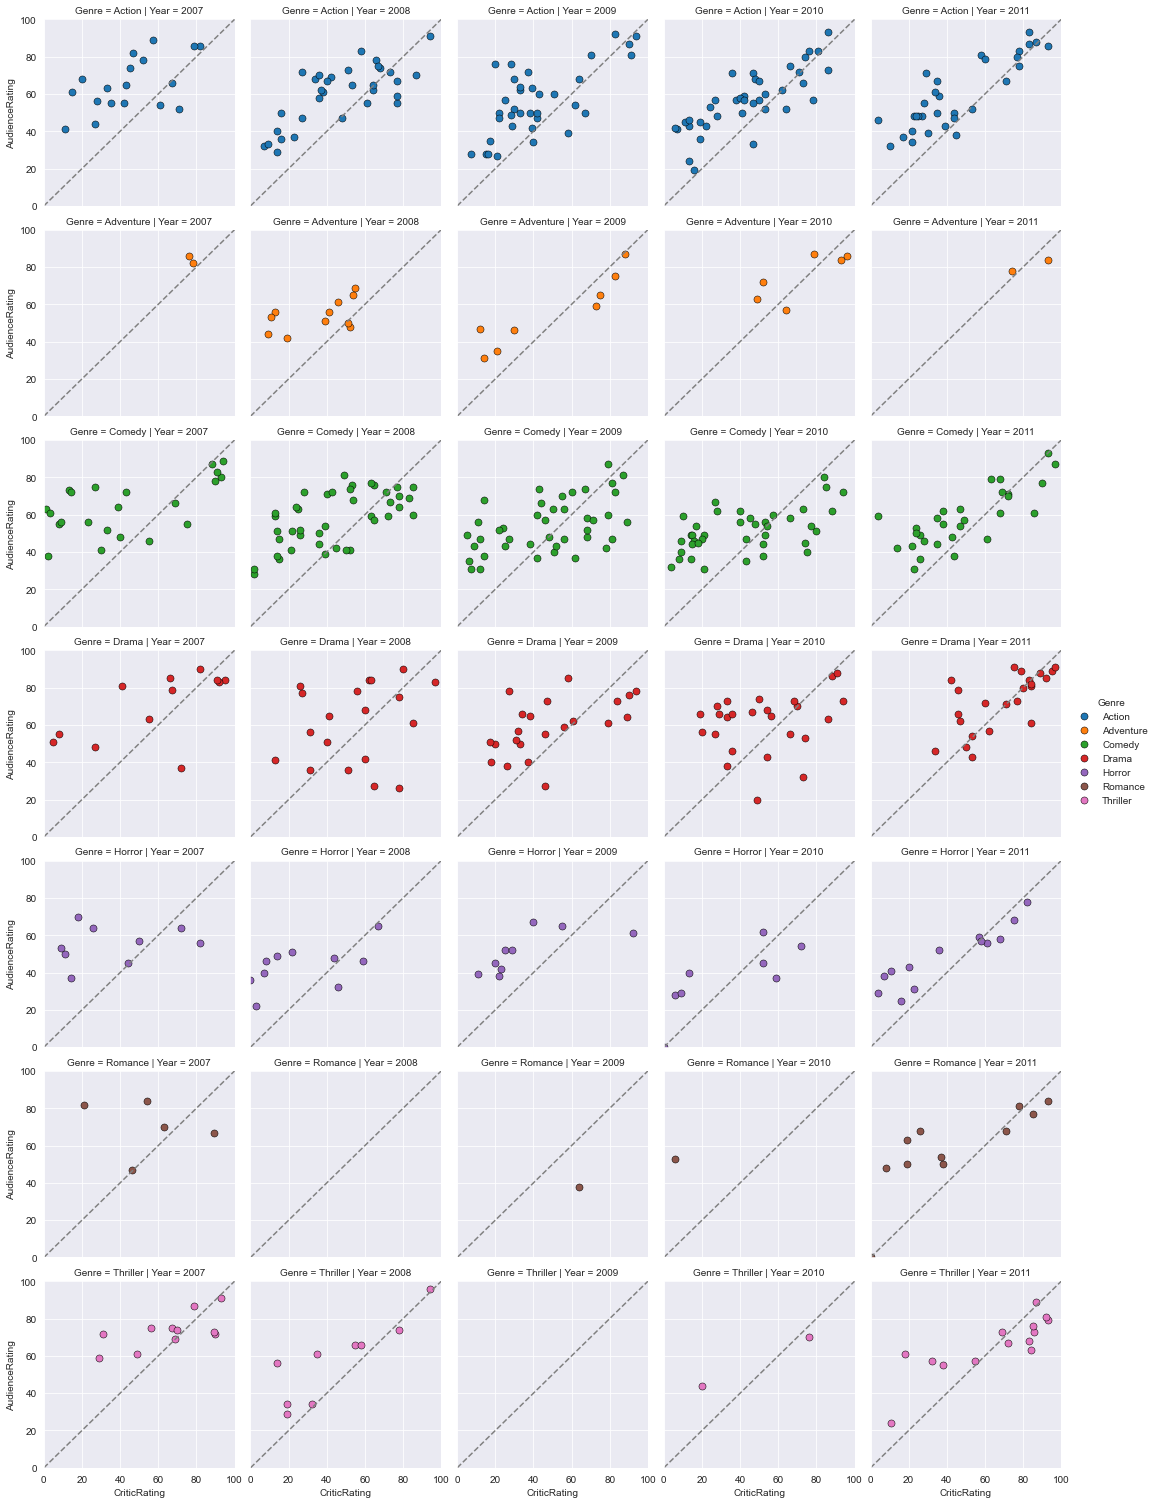

In [175]:
#Controlling Axes and Adding Diagonals
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ## Simplifing our observation
    ax.plot((0, 100), (0,100), c='gray', ls='--')
g.add_legend()

---

Dashboard

In [176]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") ## adding styles

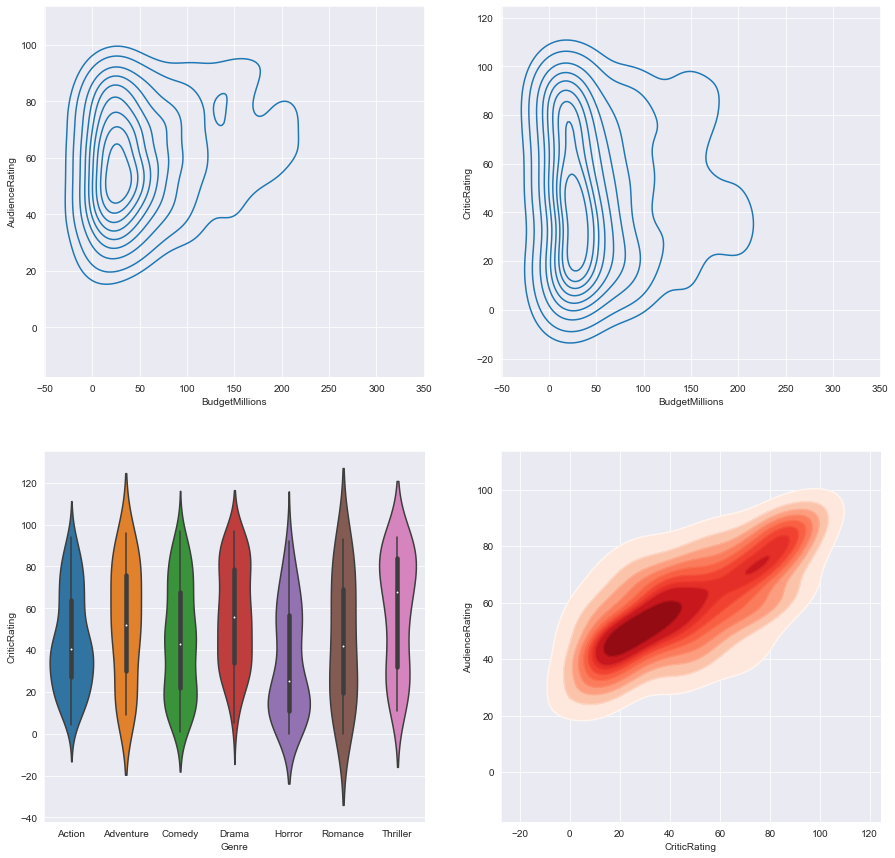

In [183]:
# plt is par of matplotlib, seaborn made it easy to integrate with it by passing ax value
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1])
z = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1, 0])
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1,1])
# for not seaborn plots (matplotlib)
# axes[1,1].hist(movies.BudgetMillions)


---

Styling Dashboard

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") ## adding styles

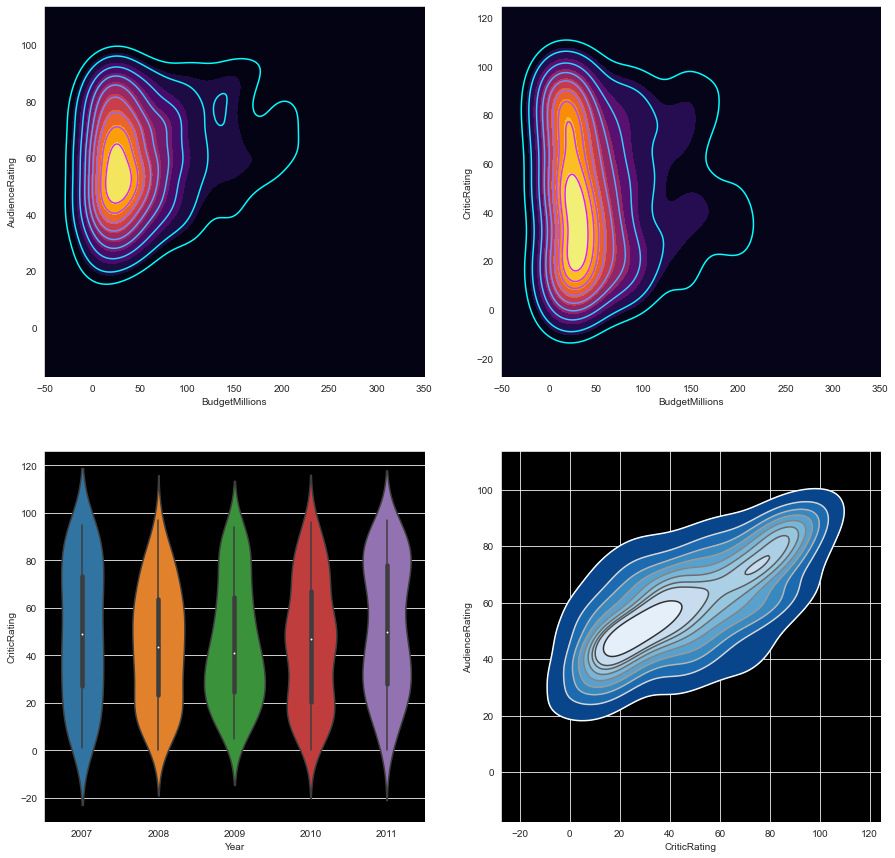

In [195]:
sns.set_style("darkgrid", {"axes.facecolor": "black"}) ## adding black background
# plt is par of matplotlib, seaborn made it easy to integrate with it by passing ax value
f, axes = plt.subplots(2,2, figsize=(15,15))

##KDE Plot colors: "inferno", "gist_gray_r" 
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,shade_lowest=True, shade=True, cmap='inferno', ax=axes[0, 0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0, 0])

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade_lowest=True, shade=True, cmap='inferno', ax=axes[0, 1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='cool', ax=axes[0, 1])

k3 = sns.violinplot(data=movies, x='Year', y='CriticRating', ax=axes[1, 0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r')
# axes[1,1].hist(movies.BudgetMillions)
